<a href="https://colab.research.google.com/github/paulrajkhowa/paulrajkhowa/blob/main/knn_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np

np.sqrt(200)


14.142135623730951

In [4]:
#Titanic dataset using kNN algorithm

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [6]:
data=sns.load_dataset('titanic')

In [7]:
data.head()


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [10]:
data['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

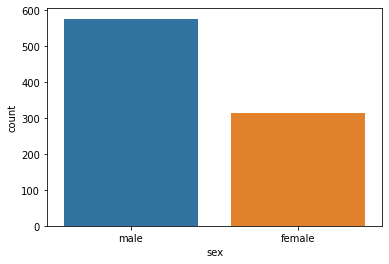

In [11]:
sns.countplot(x=data['sex'])
plt.show()

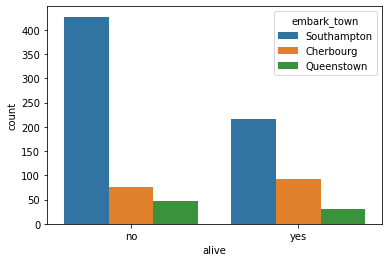

In [17]:
sns.countplot(x=data['alive'], hue = data['embark_town'])
plt.show()

In [18]:
data.columns

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')

In [21]:
data_final= data[['survived','pclass','sex','age','sibsp','parch','embarked']]

In [22]:
data_final

,survived,pclass,sex,age,sibsp,parch,embarked
0,0,3,male,22.0,1,0,S
1,1,1,female,38.0,1,0,C
2,1,3,female,26.0,0,0,S
3,1,1,female,35.0,1,0,S
4,0,3,male,35.0,0,0,S
...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,S
887,1,1,female,19.0,0,0,S
888,0,3,female,NaN,1,2,S
889,1,1,male,26.0,0,0,C


In [23]:
data_final.isnull().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
embarked      2
dtype: int64

In [24]:
mean_age = np.round(data_final['age'].mean(),2)
data_final['age'] = data_final['age'].fillna(mean_age)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [25]:
data_final = data_final.dropna()

In [27]:
data_final.isnull().sum()

survived    0
pclass      0
sex         0
age         0
sibsp       0
parch       0
embarked    0
dtype: int64

In [28]:
len(data_final)

889

In [29]:
data_final['sex'].unique()

array(['male', 'female'], dtype=object)

In [30]:
data_final['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_final['Embarked_new'] = le.fit_transform(data_final['embarked'])
### C=0, Q=1, S=2

In [32]:
data_final.head(20)

,survived,pclass,sex,age,sibsp,parch,embarked,Embarked_new
0,0,3,male,22.0,1,0,S,2
1,1,1,female,38.0,1,0,C,0
2,1,3,female,26.0,0,0,S,2
3,1,1,female,35.0,1,0,S,2
4,0,3,male,35.0,0,0,S,2
5,0,3,male,29.7,0,0,Q,1
6,0,1,male,54.0,0,0,S,2
7,0,3,male,2.0,3,1,S,2
8,1,3,female,27.0,0,2,S,2
9,1,2,female,14.0,1,0,C,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_final['sex_new'] = le.fit_transform(data_final['sex'])
### C=0, Q=1, S=2

In [34]:
data_final.head()

,survived,pclass,sex,age,sibsp,parch,embarked,Embarked_new,sex_new
0,0,3,male,22.0,1,0,S,2,1
1,1,1,female,38.0,1,0,C,0,0
2,1,3,female,26.0,0,0,S,2,0
3,1,1,female,35.0,1,0,S,2,0
4,0,3,male,35.0,0,0,S,2,1


In [35]:
data_final=data_final.drop(['sex','embarked'], axis=1)
data_final.head(20)

,survived,pclass,age,sibsp,parch,Embarked_new,sex_new
0,0,3,22.0,1,0,2,1
1,1,1,38.0,1,0,0,0
2,1,3,26.0,0,0,2,0
3,1,1,35.0,1,0,2,0
4,0,3,35.0,0,0,2,1
5,0,3,29.7,0,0,1,1
6,0,1,54.0,0,0,2,1
7,0,3,2.0,3,1,2,1
8,1,3,27.0,0,2,2,0
9,1,2,14.0,1,0,0,0


In [36]:
x=data_final.iloc[:,1:].values
x

array([[ 3. , 22. ,  1. ,  0. ,  2. ,  1. ],
       [ 1. , 38. ,  1. ,  0. ,  0. ,  0. ],
       [ 3. , 26. ,  0. ,  0. ,  2. ,  0. ],
       ...,
       [ 3. , 29.7,  1. ,  2. ,  2. ,  0. ],
       [ 1. , 26. ,  0. ,  0. ,  0. ,  1. ],
       [ 3. , 32. ,  0. ,  0. ,  1. ,  1. ]])

In [37]:
y=data_final.iloc[:,0].values
y

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,

In [38]:
x.shape

(889, 6)

In [39]:
y.shape

(889,)

In [40]:
### Split data into training and testing samples
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.85,
                                             random_state = 0)

In [41]:
pd.DataFrame(y).value_counts()

0    549
1    340
dtype: int64

In [42]:
pd.DataFrame(ytrain).value_counts()

0    469
1    286
dtype: int64

In [44]:
#Build the model

In [45]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3,p=2)

In [47]:
#Train the model
model.fit(xtrain,ytrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [48]:
#Test the model
ypred=model.predict(xtest)
ypred

array([1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0])

In [49]:
df = pd.DataFrame()
df['YTest'] = ytest
df['Ypred'] = ypred
df

,YTest,Ypred
0,0,1
1,0,0
2,1,1
3,0,1
4,1,0
...,...,...
129,0,0
130,0,0
131,0,0
132,0,1


In [50]:
count = 0
for i in range(len(ytest)):
  if ytest[i] == ypred[i]:
    count = count + 1

In [51]:
count

93

In [52]:
acc = count/len(ytest)
acc * 100

69.40298507462687

In [59]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(ytest,ypred)
cm

array([[62, 18],
       [23, 31]])

In [60]:
accuracy=(62+31)/(62+18+23+31)

In [61]:
accuracy*100

69.40298507462687

In [62]:
cm.diagonal()

array([62, 31])

In [63]:
cm.diagonal().sum()/cm.sum()

0.6940298507462687

In [64]:
from sklearn.metrics import accuracy_score
a = accuracy_score(ytest,ypred)
a

0.6940298507462687

In [66]:
accu = []
for k in range(1,len(xtrain)):
  model1 = KNeighborsClassifier(n_neighbors=k,p=2)
  model1.fit(xtrain,ytrain)
  ypred1 = model1.predict(xtest)
  ac = accuracy_score(ytest,ypred1)
  accu.append(ac)

In [67]:
np.max(accu)

0.7089552238805971

In [71]:
accur = []
for k in range(1,len(xtrain)):
  model1 = KNeighborsClassifier(n_neighbors=k,p=1)
  model1.fit(xtrain,ytrain)
  ypred1 = model1.predict(xtest)
  acu = accuracy_score(ytest,ypred1)
  accur.append(acu)
 

In [70]:
np.max(accur)

0.7313432835820896